Spatio-temporal dynamics of functional connectivity
--

Step 1 -- compute FC matrices in sliding windows 

In [30]:
import numpy as np 
from matplotlib import pyplot as plt 
from nilearn.plotting import plot_matrix, plot_connectome
from dfc import dfc_slid_window
%matplotlib inline

Scan the directory and read time series 

In [31]:
import os 
datapath = '/Users/nicolasfarrugia/Documents/recherche/data_mpilmbb/'
fileslist = os.listdir(os.path.join(datapath,'10subjects')) 

In [32]:
allts = []
allid = []

for curfile in fileslist:
    allts.append(np.load(os.path.join(datapath,'10subjects',curfile))['ts'])
    allid.append(np.load(os.path.join(datapath,'10subjects',curfile))['id'])

In [4]:
allts = np.stack(allts)

In [5]:
allts.shape

(40, 652, 93)

In [6]:
dfc_slid_window?

Calculate sliding windows 

In [7]:
all_sl,_ = dfc_slid_window(allts)

In [8]:
all_sl.shape

(40, 622, 30, 93)

this corresponds to (subjects, time, window size,regions )

Computing FC matrices for all windows

In [9]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='covariance',vectorize=False,discard_diagonal=True)

all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
    
all_FC_sl = np.stack(all_FC_sl)

In [10]:
all_FC_sl.shape

(40, 622, 93, 93)

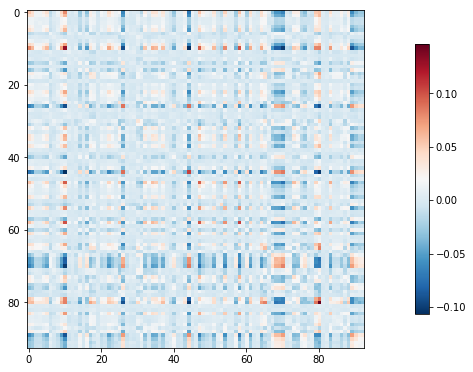

In [11]:
plot_matrix(all_FC_sl[0,13])

Calculate similarity across the temporal dimension 

recomputing connectivity and vectorizing to make it easier for calculating distance 

In [12]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='covariance',vectorize=True,discard_diagonal=True)

all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
    
all_FC_sl = np.stack(all_FC_sl)

go through all subjects

In [13]:
all_FC_sl.shape

(40, 622, 4278)

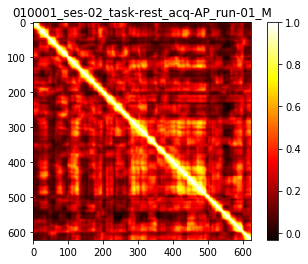

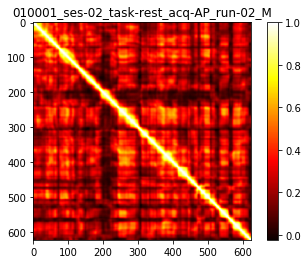

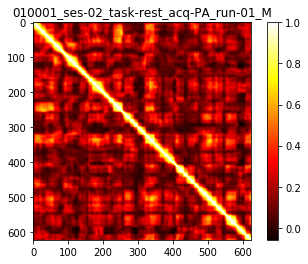

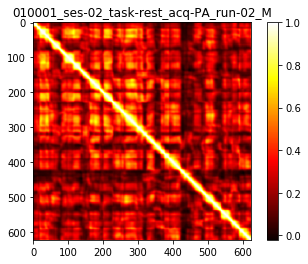

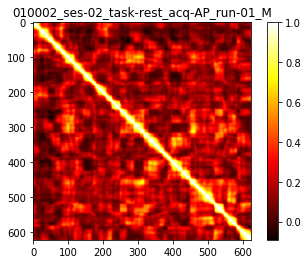

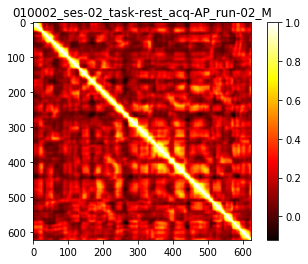

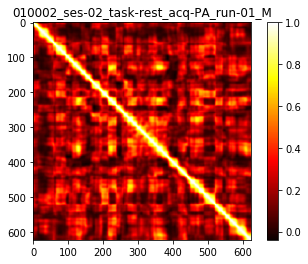

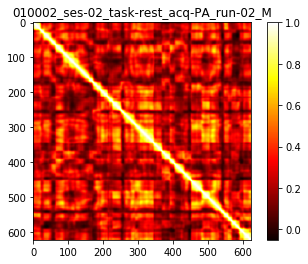

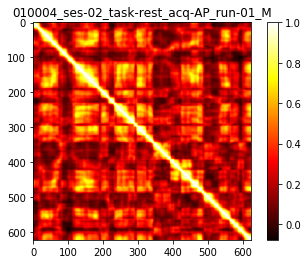

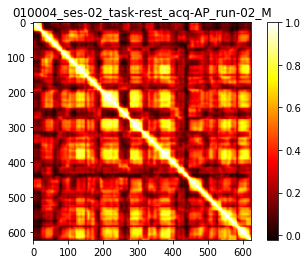

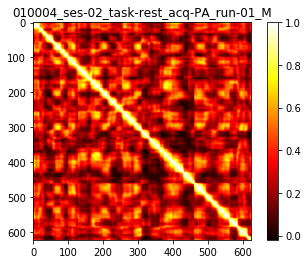

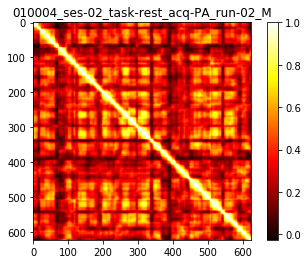

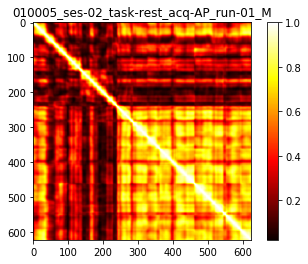

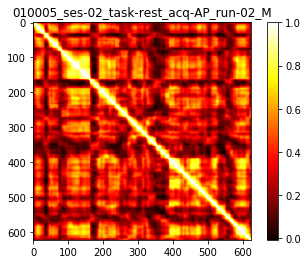

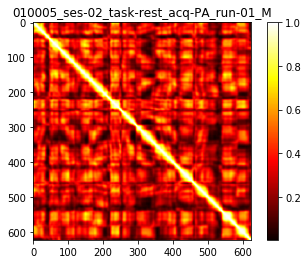

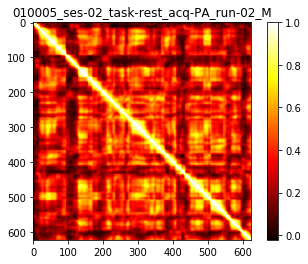

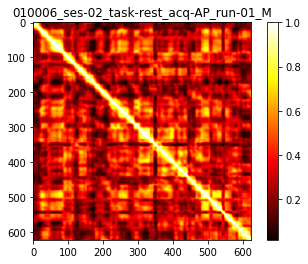

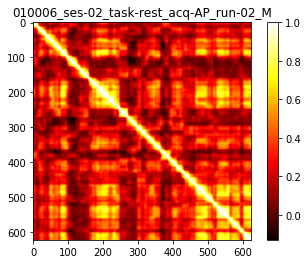

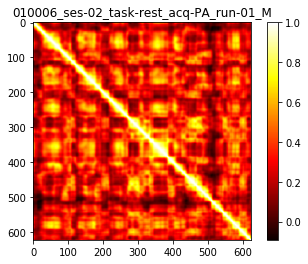

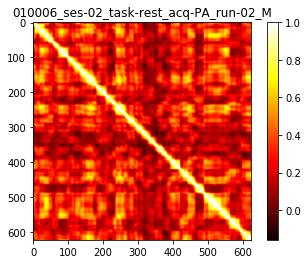

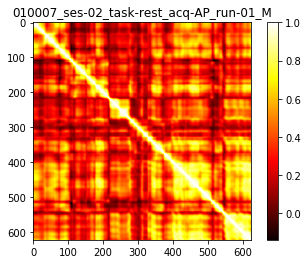

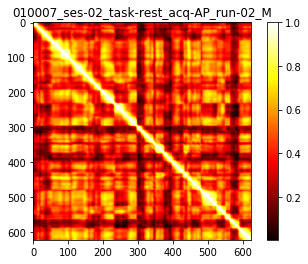

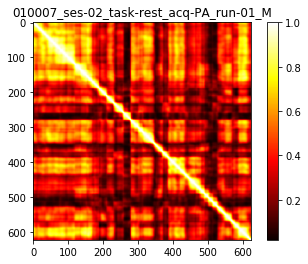

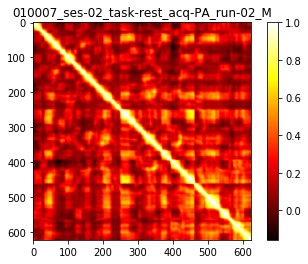

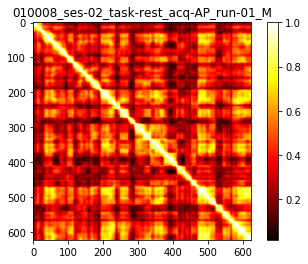

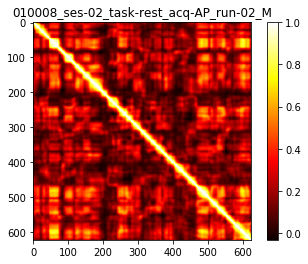

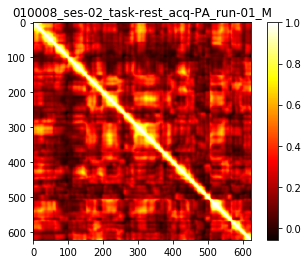

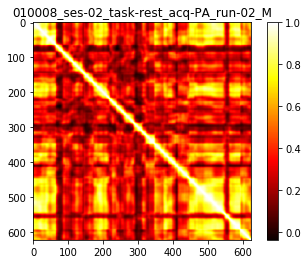

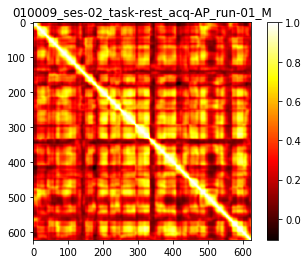

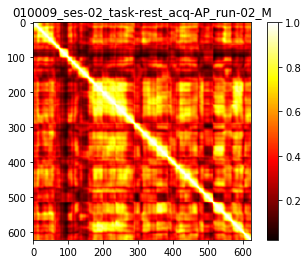

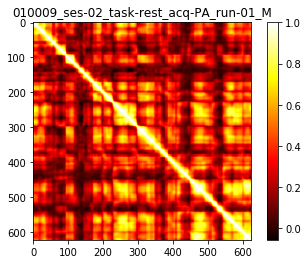

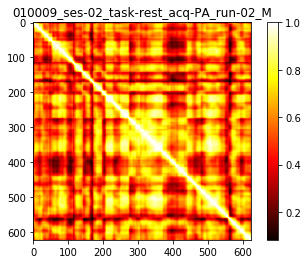

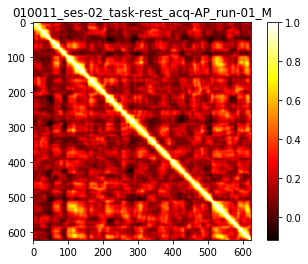

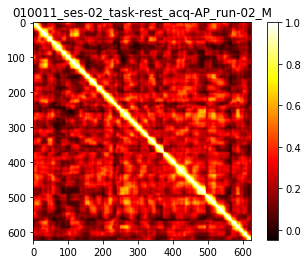

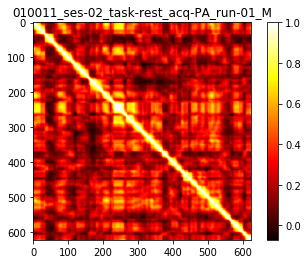

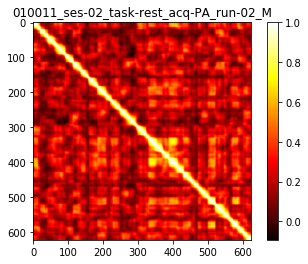

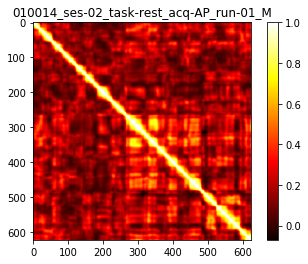

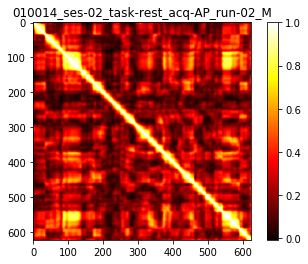

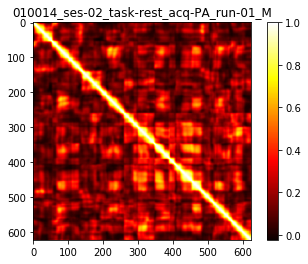

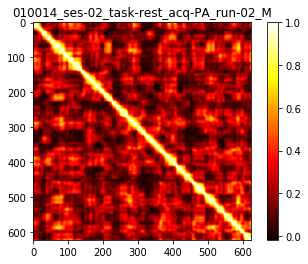

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

all_cosine_sim = []
for i,slFC in enumerate(all_FC_sl): # subjects
    #windows
    cur_sim = cosine_similarity(slFC)
    all_cosine_sim.append(cur_sim)
    plt.imshow(cur_sim,cmap=plt.cm.hot)
    plt.title(allid[i])
    plt.colorbar()
    plt.show()
    
all_cosine_sim = np.stack(all_cosine_sim)

Save the results 

In [15]:
np.savez_compressed(os.path.join(datapath,'FC_variability.npz'),all_cosine_sim=all_cosine_sim,ids=allid)

Redo it using precision

In [ ]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='precision',vectorize=True,discard_diagonal=True)

all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
all_FC_sl = np.stack(all_FC_sl)

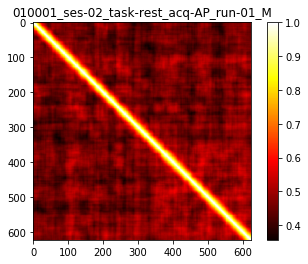

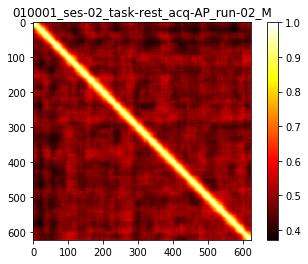

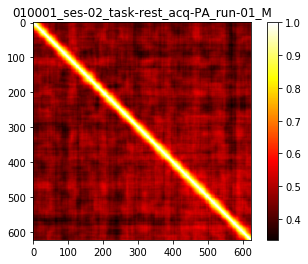

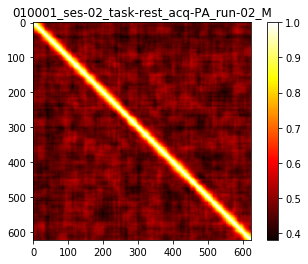

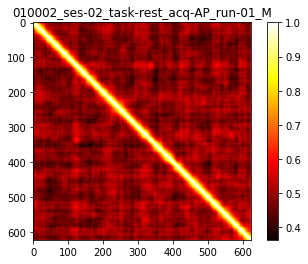

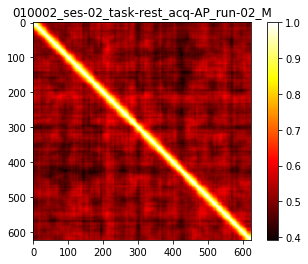

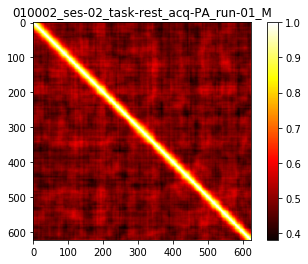

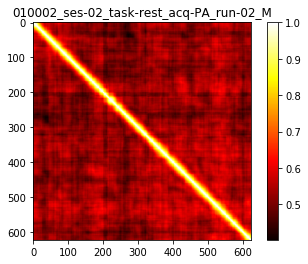

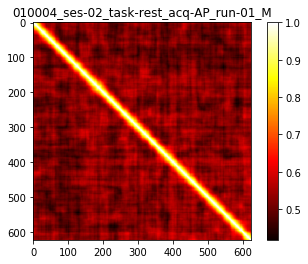

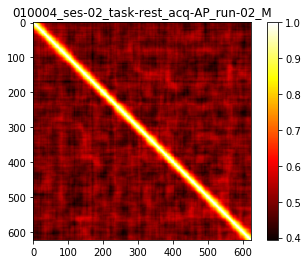

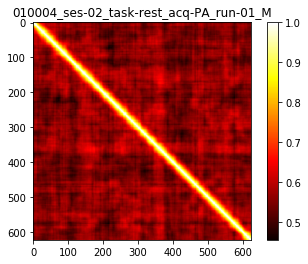

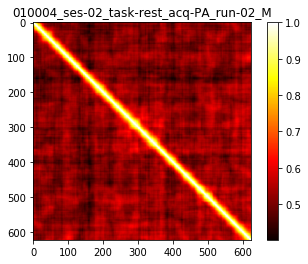

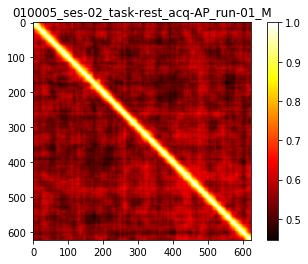

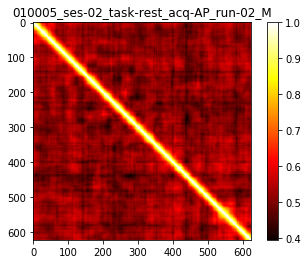

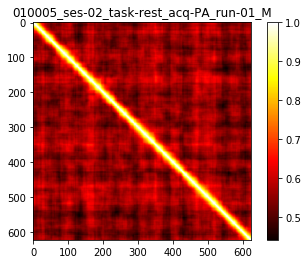

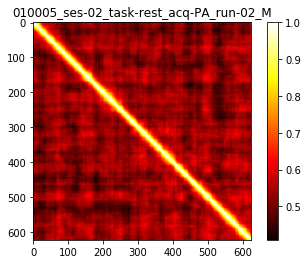

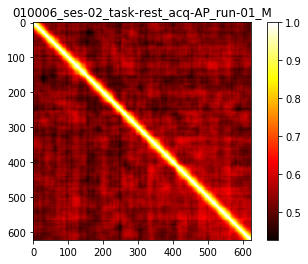

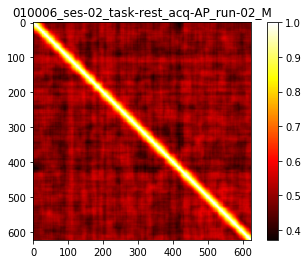

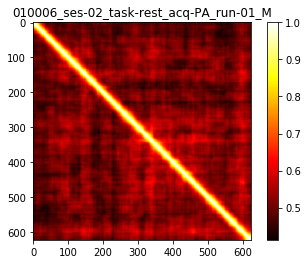

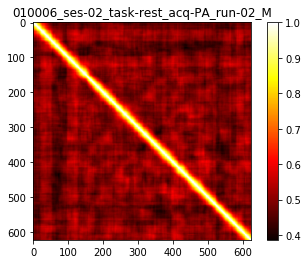

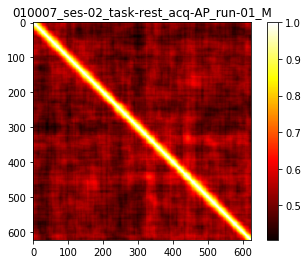

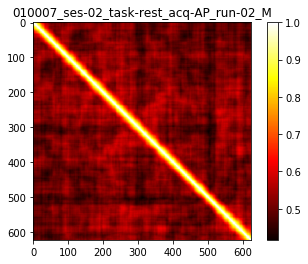

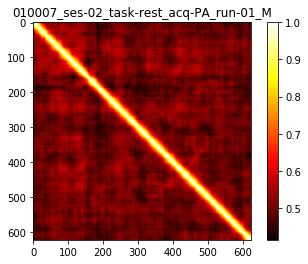

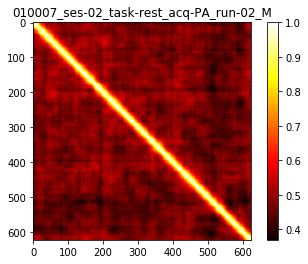

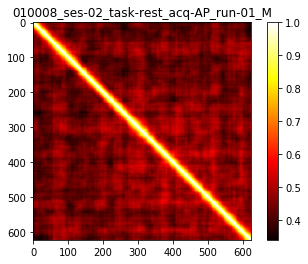

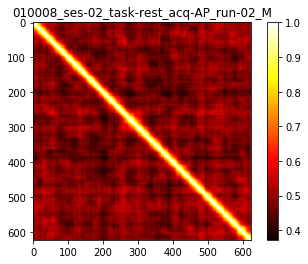

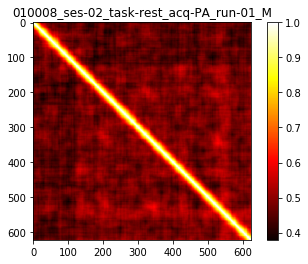

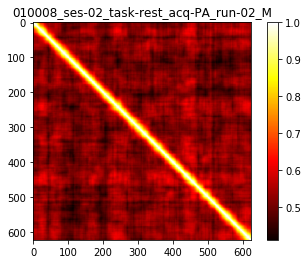

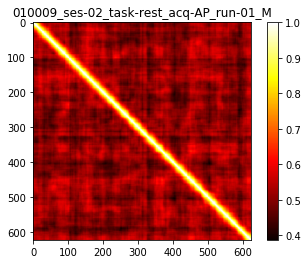

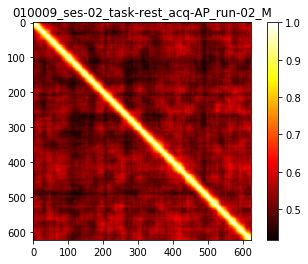

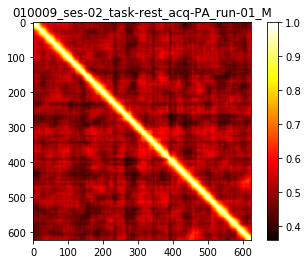

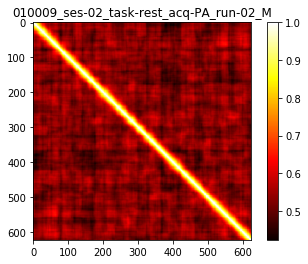

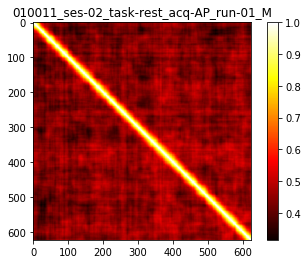

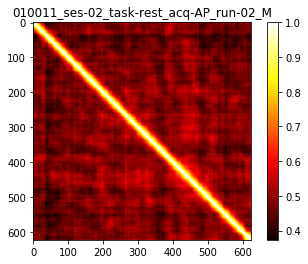

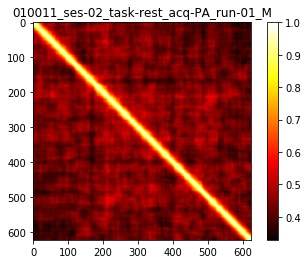

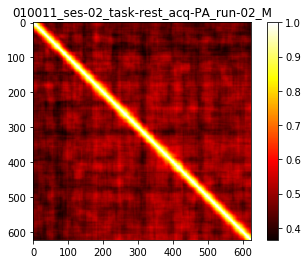

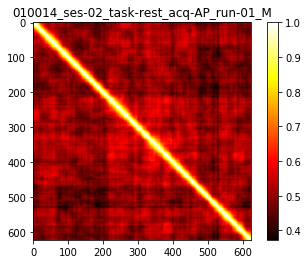

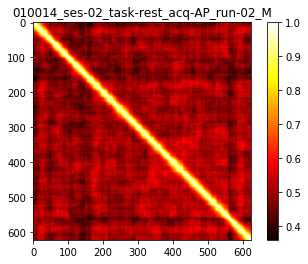

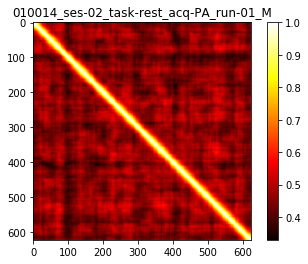

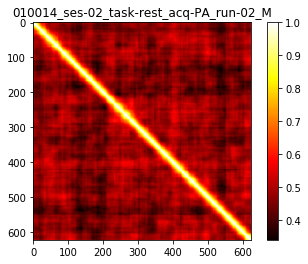

In [33]:
all_cosine_sim = []
for i,slFC in enumerate(all_FC_sl): # subjects
    #windows
    cur_sim = cosine_similarity(slFC)
    all_cosine_sim.append(cur_sim)
    plt.imshow(cur_sim,cmap=plt.cm.hot)
    plt.title(allid[i])
    plt.colorbar()
    plt.show()
    
all_cosine_sim = np.stack(all_cosine_sim)

In [ ]:
np.savez_compressed(os.path.join(datapath,'FC_variability_precision.npz'),all_cosine_sim=all_cosine_sim,ids=allid)

In [34]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='tangent',vectorize=True,discard_diagonal=True)

all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
all_FC_sl = np.stack(all_FC_sl)

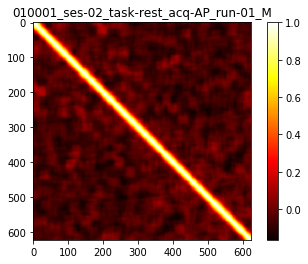

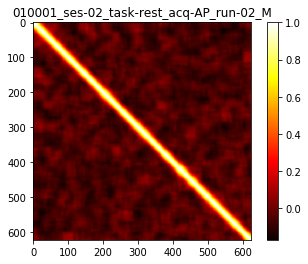

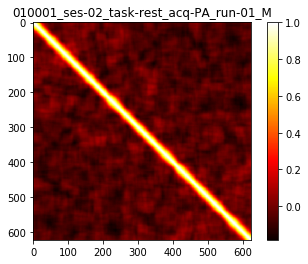

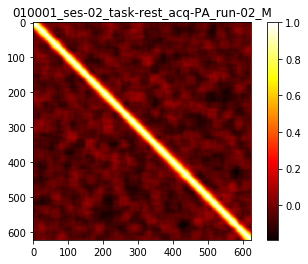

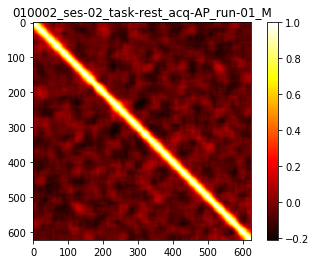

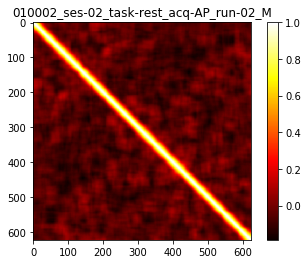

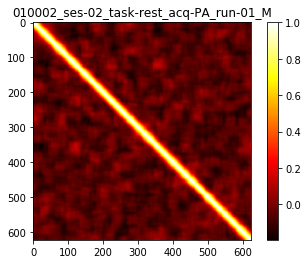

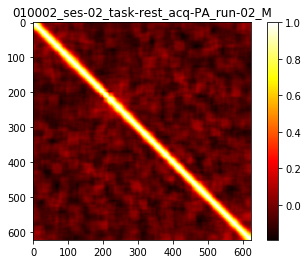

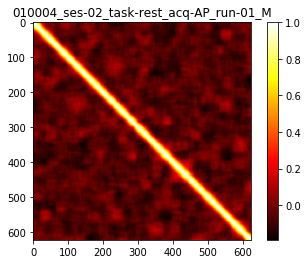

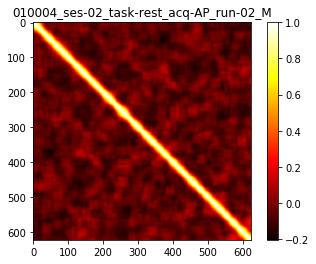

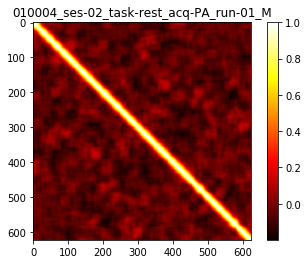

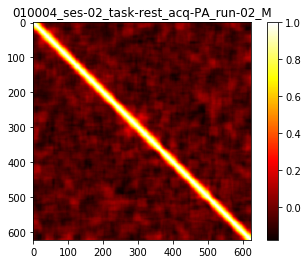

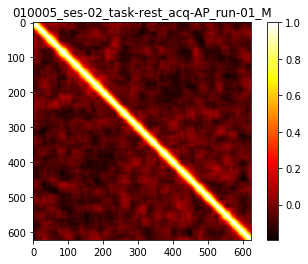

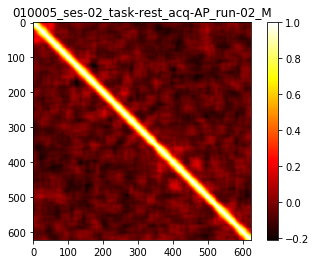

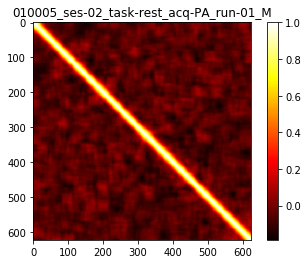

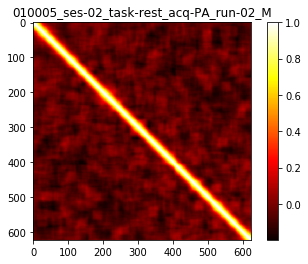

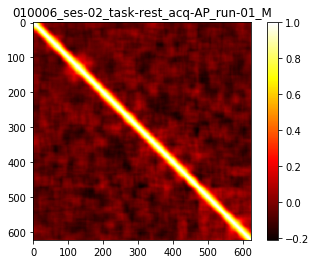

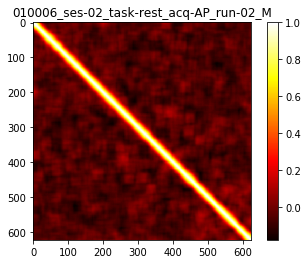

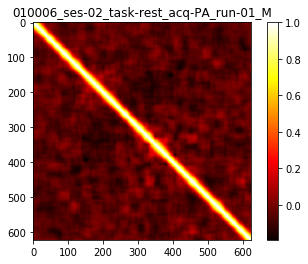

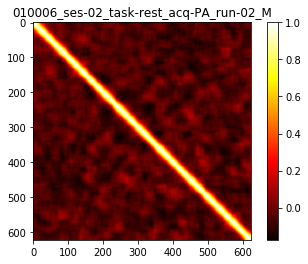

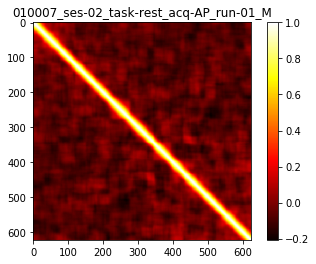

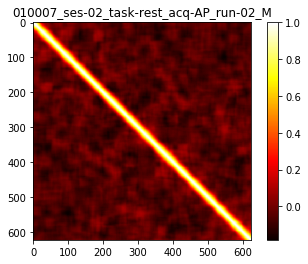

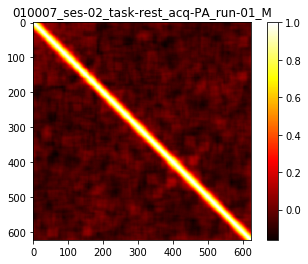

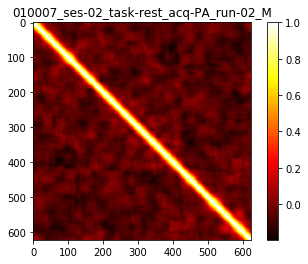

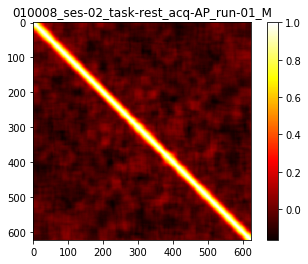

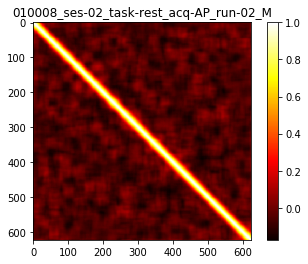

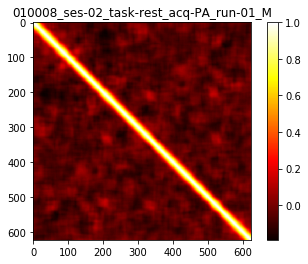

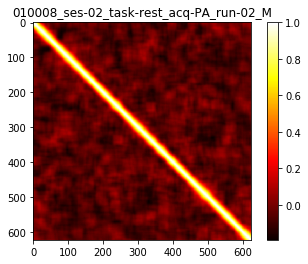

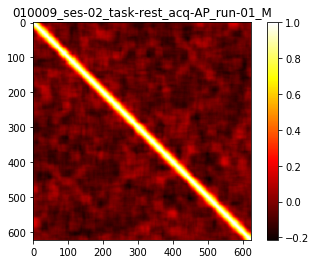

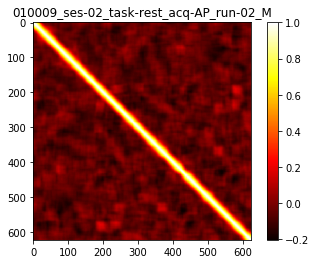

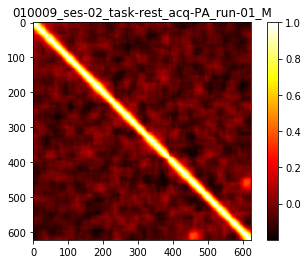

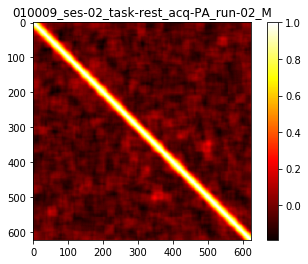

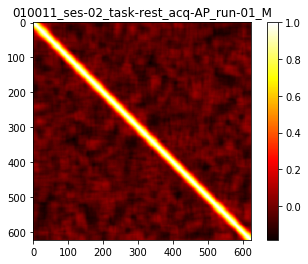

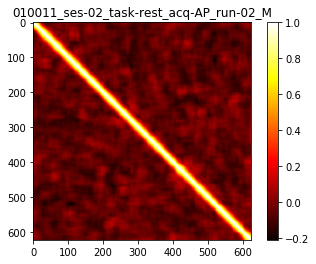

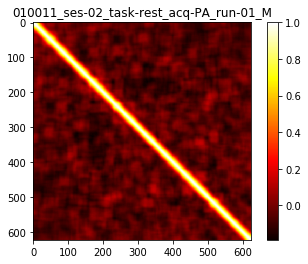

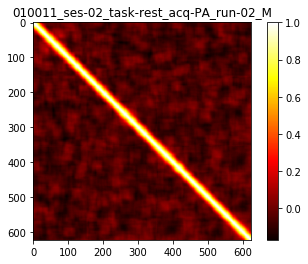

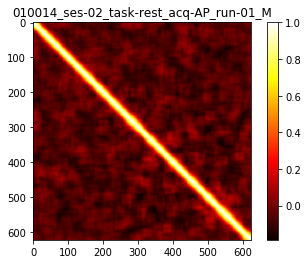

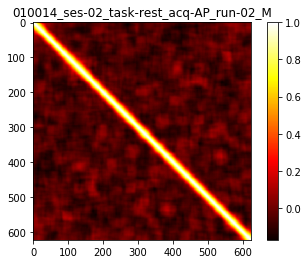

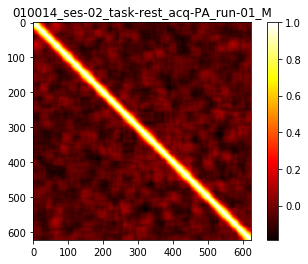

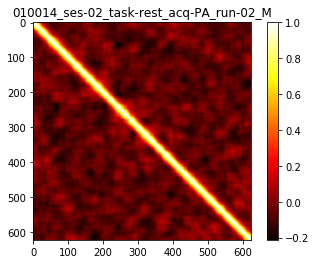

In [35]:
all_cosine_sim = []
for i,slFC in enumerate(all_FC_sl): # subjects
    #windows
    cur_sim = cosine_similarity(slFC)
    all_cosine_sim.append(cur_sim)
    plt.imshow(cur_sim,cmap=plt.cm.hot)
    plt.title(allid[i])
    plt.colorbar()
    plt.show()
    
all_cosine_sim = np.stack(all_cosine_sim)

In [36]:
np.savez_compressed(os.path.join(datapath,'FC_variability_tangent.npz'),all_cosine_sim=all_cosine_sim,ids=allid)